In [63]:
import numpy as np
import matplotlib.pyplot as plt

In [64]:
T = 1.0
n_paths = 50
n_steps = 100
seed = None
K = S_0 = 100
mu = 0.05
o = 0.2
r = 0.03

In [65]:

def brownian_motion(T, n_paths, n_steps, seed):
  dt = T / n_steps
  t = np.linspace(0, T, n_steps + 1)
  dW = np.sqrt(dt) * np.random.normal(size=(n_paths, n_steps))
  W = np.empty((n_paths, n_steps + 1))
  W[:, 0] = 0.0
  W[:, 1:] = np.cumsum(dW, axis=1)
  return t, W


In [66]:
def geometric_brownian_motion(T, n_paths, n_steps, seed, S_0, mu, o):
  t, W = brownian_motion(T, n_paths, n_steps, seed)
  S = np.empty((n_paths, n_steps + 1))
  for i in range(0, n_steps+1):
    S[:, i] = S_0 * np.exp((mu-(1/2)*o**2) * t[i] + o * W[:, i] )
  return S


In [67]:
def price_european_call_monte_carlo(T, n_paths, n_steps, seed, S_0, mu, o, r):
  S = geometric_brownian_motion(T, n_paths, n_steps, seed, S_0, mu, o)
  t = brownian_motion(T, n_paths, n_steps, seed)
  S_T = S[:, -1]
  payoffs = np.maximum(S_T - K, 0)
  discounted_payoffs = np.exp(-r * T) * payoffs
  price = np.mean(discounted_payoffs)
  return price


In [68]:
def price_european_put_monte_carlo(T, n_paths, n_steps, seed, S_0, mu, o, r):
  S = geometric_brownian_motion(T, n_paths, n_steps, seed, S_0, mu, o)
  t = brownian_motion(T, n_paths, n_steps, seed)
  S_T = S[:, -1]
  payoffs = np.maximum(K - S_T, 0)
  discounted_payoffs = np.exp(-r * T) * payoffs
  price = np.mean(discounted_payoffs)
  return price

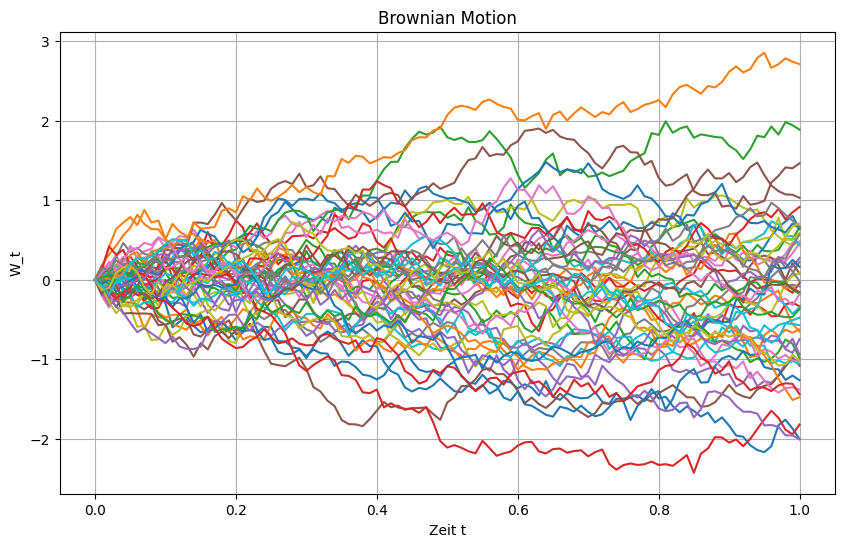

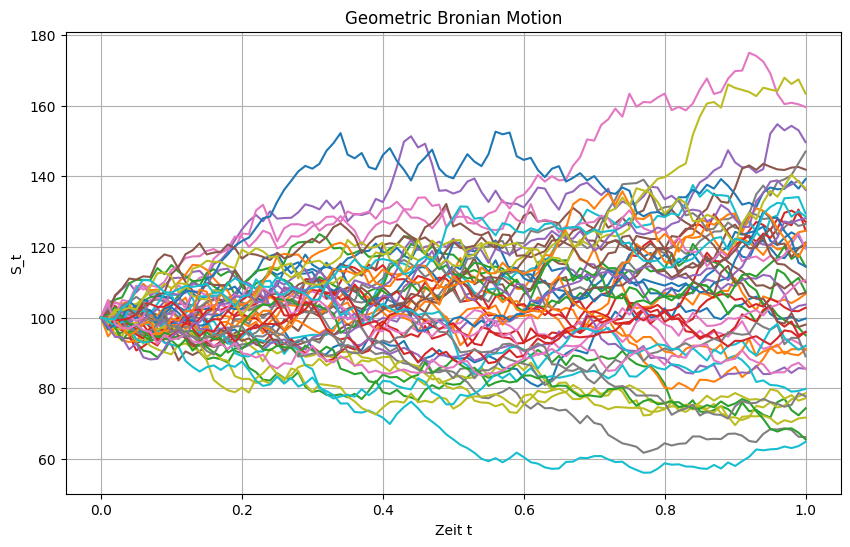

Der faire preis der Calloption ist 12.618161177222946
Der faire Preis der Putoption ist 5.505187098380231


In [69]:

t, W = brownian_motion(T, n_paths, n_steps, seed)
S = geometric_brownian_motion(T, n_paths, n_steps, seed, S_0, mu, o)
plt.figure(figsize=(10, 6))
for i in range(n_paths):
    plt.plot(t, W[i])
plt.title("Brownian Motion")
plt.xlabel("Zeit t")
plt.ylabel("W_t")
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
for i in range(n_paths):
  plt.plot(t,S[i])
plt.title("Geometric Bronian Motion")
plt.xlabel("Zeit t")
plt.ylabel("S_t")
plt.grid(True)
plt.show()

print("Der faire preis der Calloption ist",price_european_call_monte_carlo(T, n_paths, n_steps, seed, S_0, mu, o, r))
print("Der faire Preis der Putoption ist",price_european_put_monte_carlo(T, n_paths, n_steps, seed, S_0, mu, o, r))